# Module 3: Time Series Decomposition Assignment
Trey Stowe <br>
July 25, 2021 <br>
BUAD 5112

In [1]:
#Keep graphs within the Jupyter notebook
%matplotlib inline

#Import matplotlib graphing package
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Import pandas package
import pandas as pd

#Import numpy package
import numpy as np

pd.options.mode.chained_assignment = None 

## Public Construction Spending

In [2]:
#Import the ConstructionTimeSeriesDataV2.csv file
df_cts = pd.read_csv('ConstructionTimeSeriesDataV2.csv')

In [3]:
#Create a Public Construction dataframe with columns for moving average and squared error
dfPub = df_cts[['Month', 'Public Construction']]
dfPub.insert(0, 'Date', pd.date_range(start = '2002-01-31', end = '2014-02-28', freq = 'M')) #Restructure the date
dfPub = dfPub.set_index('Date') #Set the date as the index
dfPub['MovAvgPub'] = np.NaN
dfPub['SqErrPub'] = np.NaN

In this cell, the time series is plotted to visualize the data and observe any trend. The moving average is calculated and plotted over the original time series. This particular moving average calculation method was chosen to reduce the squared error.

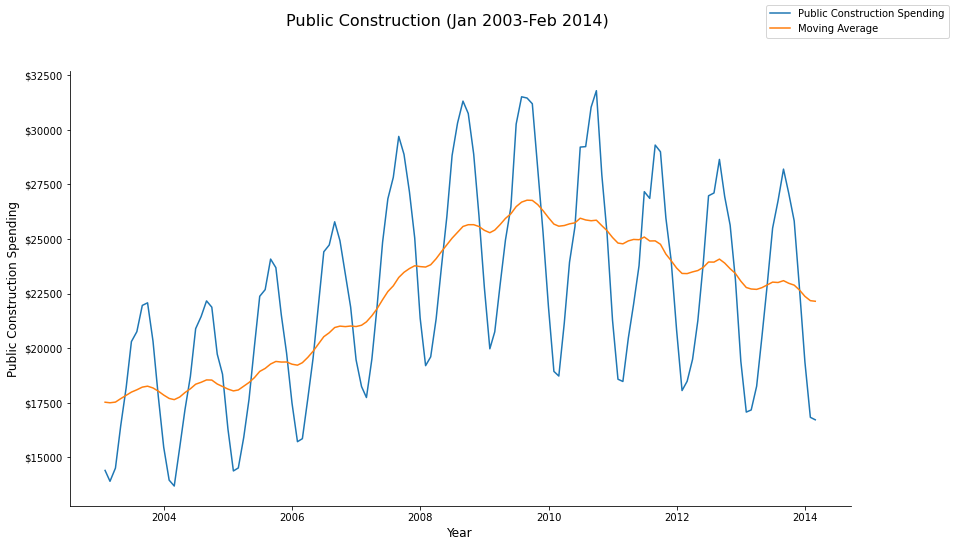

In [4]:
#Create a function for squared error
def SqErr(row):
    return (row['Public Construction'] - row['MovAvgPub']) ** 2

#Calculate the moving average and squared error
window = 13
dfPub['MovAvgPub'] = dfPub['Public Construction'].rolling(window = window).mean() #This method produces the smallest squared error
dfPub['SqErrPub'] = dfPub.apply(SqErr, axis = 'columns')
dfPub.dropna(how = 'any', inplace = True)

#Plot the Public Construction dataframe and moving average
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Public Construction (Jan 2003-Feb 2014)', fontsize = 16)

ax.plot(dfPub['Public Construction'], label = 'Public Construction Spending')
ax.plot(dfPub['MovAvgPub'], label = 'Moving Average')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend();

The residual Public Construction spending not explained by the moving average is calculated below. Additionally, the residuals are computed as a percentage of spending ($R1ErrorPub$). The residuals are plotted for visualization. The autocorrelation of seasonal spending is calculated at various lags to determine at what frequency the seasonal pattern repeats.

Average Residual:  151.17623421354733
Correlation, lag 1    0.8545947941398758
Correlation, lag 2    0.4985713195597257
Correlation, lag 3    0.020561854488431456
Correlation, lag 4    -0.4515986045079663
Correlation, lag 5    -0.7794236150252476
Correlation, lag 6    -0.8983556603016704
Correlation, lag 7    -0.7846254168948834
Correlation, lag 8    -0.45224131641951815
Correlation, lag 9    0.02113824151919283
Correlation, lag 10    0.48686362511552894
Correlation, lag 11    0.834369351209837
Correlation, lag 12    0.9735582632385074
period =  12    Maximum Correlation =  0.9735582632385074


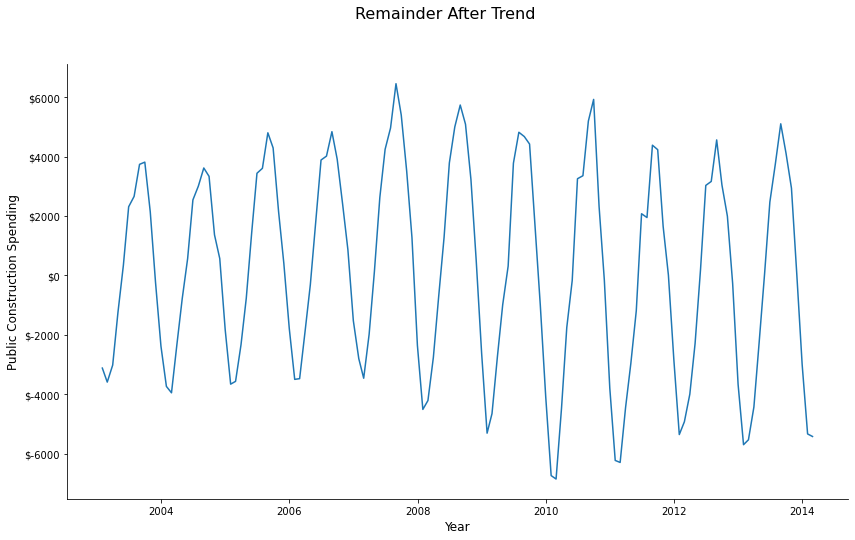

In [5]:
#Calculate the residual not explained by the moving average  
dfPub['R1Pub'] = dfPub['Public Construction'] - dfPub['MovAvgPub']
dfPub['R1ErrorPub'] = abs((dfPub['Public Construction'] - dfPub['R1Pub']) / dfPub['Public Construction'])

print('Average Residual: ', sum(dfPub['R1Pub']) / len(dfPub))

#Calculate the correlation at various lags to determine where seasonal pattern exists
maxCorr = 0.0
period = np.NaN
for i in range(1, 13):
    corr = dfPub['R1Pub'].autocorr(lag = i)
    print('Correlation, lag', i, '  ', corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ', period, '   Maximum Correlation = ', maxCorr)

#Plot the remainder not explained by the trend
fig, ax = plt.subplots()
fig.suptitle('Remainder After Trend', fontsize = 16)
fig.set_size_inches(14, 8)

ax.plot(dfPub['R1Pub'], label = 'Remainder after Trend')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc]);

Below, the time series is broken down into each of the eleven seasons apparent in the data. The average of these is then computed. A column is created in the dataframe to hold the seasonal values for each month.

In [6]:
#Calculate the average of the seasonal periods
seasonLen = period
avg = []
numSeasons = int(len(dfPub) / seasonLen + 0.5)
for j in range(seasonLen):
    if j + (numSeasons - 1) * seasonLen < len(dfPub):
        d = dfPub.iloc[range(j, j + (numSeasons - 1) * seasonLen + 1, seasonLen)]['R1Pub']
        print(j, d)
        avg.append(sum(d) / len(d))
    else:
        d = dfPub.iloc[range(j, j + (numSeasons - 2) * seasonLen + 1, seasonLen)]['R1Pub']
        print(j, d)
        avg.append(sum(d) / len(d))
dfPub['SPub'] = np.NaN
for i in range(len(dfPub)):
    dfPub.loc[dfPub.index[i], 'SPub'] = avg[i % seasonLen]


0 Date
2003-01-31   -3122.307692
2004-01-31   -3739.923077
2005-01-31   -3663.384615
2006-01-31   -3502.461538
2007-01-31   -2803.615385
2008-01-31   -4514.307692
2009-01-31   -5314.307692
2010-01-31   -6743.307692
2011-01-31   -6233.230769
2012-01-31   -5361.461538
2013-01-31   -5702.692308
Name: R1Pub, dtype: float64
1 Date
2003-02-28   -3594.384615
2004-02-29   -3954.923077
2005-02-28   -3569.307692
2006-02-28   -3478.076923
2007-02-28   -3464.076923
2008-02-29   -4215.692308
2009-02-28   -4656.461538
2010-02-28   -6859.384615
2011-02-28   -6300.769231
2012-02-29   -4930.153846
2013-02-28   -5537.384615
Name: R1Pub, dtype: float64
2 Date
2003-03-31   -3020.923077
2004-03-31   -2319.153846
2005-03-31   -2337.923077
2006-03-31   -1887.307692
2007-03-31   -1981.538462
2008-03-31   -2758.307692
2009-03-31   -2724.923077
2010-03-31   -4475.384615
2011-03-31   -4448.384615
2012-03-31   -4000.307692
2013-03-31   -4434.000000
Name: R1Pub, dtype: float64
3 Date
2003-04-30   -1245.230769
2004

In this cell, the seasonal component from above is plotted with the first residuals to observe how well they correspond.

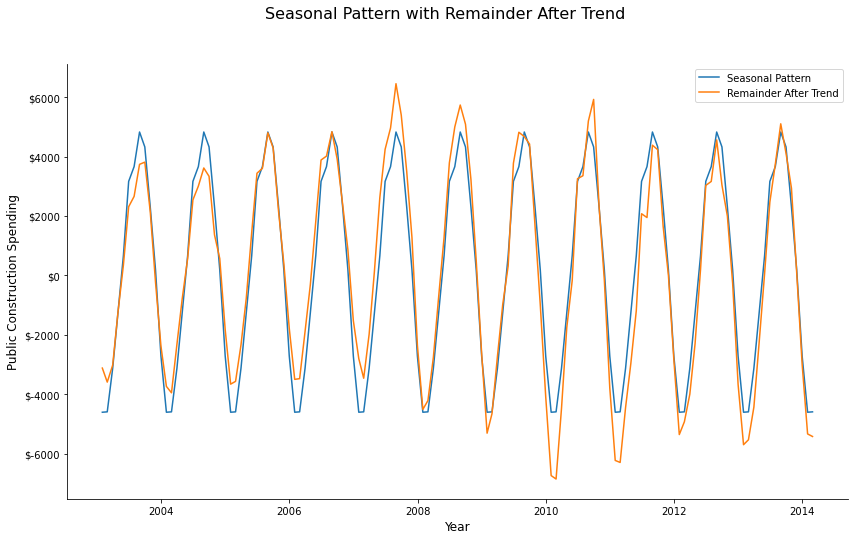

In [7]:
#Plot the seasonal pattern with the remainder after the trend is removed
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Seasonal Pattern with Remainder After Trend', fontsize = 16)

ax.plot(dfPub['SPub'], label = 'Seasonal Pattern')
ax.plot(dfPub['R1Pub'], label = 'Remainder After Trend')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
ax.legend();

Below, the eleven seasonal instances within the time series are plotted along with their average.

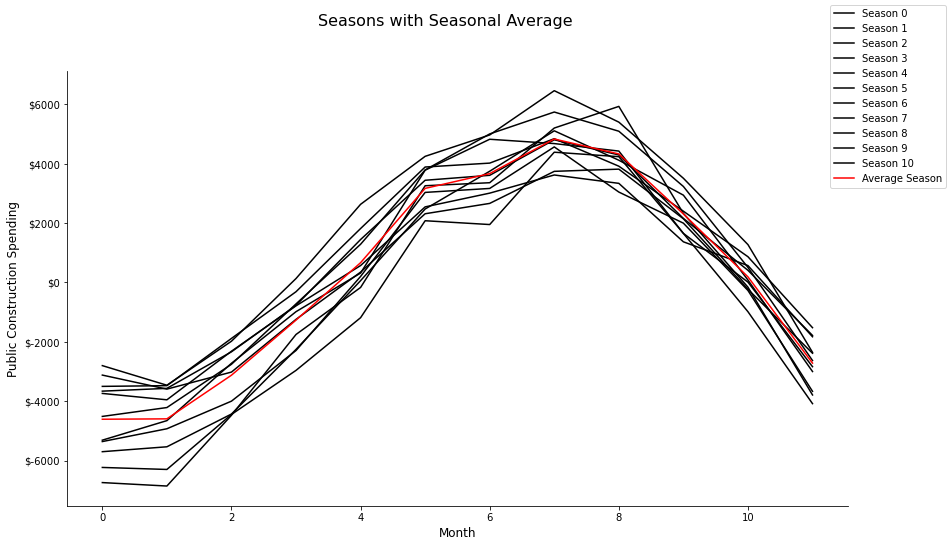

In [8]:
#Plot each year's seasonal pattern with the average
Seasons = [dfPub.iloc[range(i * period, min((i + 1) * period, len(dfPub)))]['R1Pub'] for i in range(numSeasons)]
PtsInSeasons = [dfPub.iloc[range(i , len(dfPub['R1Pub']), period)]['R1Pub'].tolist() for i in range(period)]

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Seasons with Seasonal Average', fontsize = 16)

for i in range(len(Seasons)):
    ax.plot(Seasons[i].values, label = 'Season ' + str(i), c = 'k')
ax.plot(avg, label = 'Average Season', c = 'r')
ax.set_xlabel('Month', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
fig.legend(fontsize = 10);

In the plot below, the orignal data is plotted along with the fitted model that takes trend and seasonality into account.

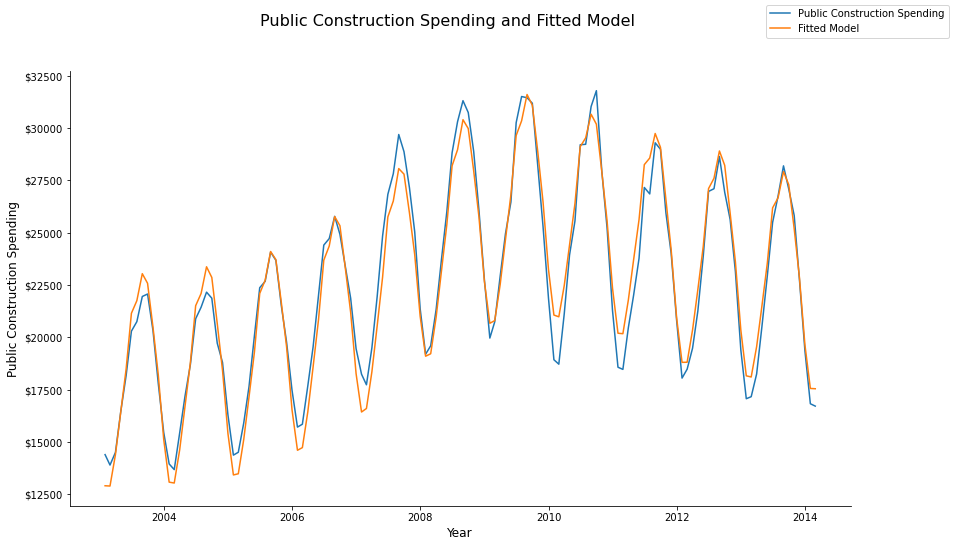

In [9]:
#Find the remaining residual construction spending to be explained after accounting for seasonality
dfPub['R2Public'] = dfPub['R1Pub'] - dfPub['SPub']
dfPub['R2ErrorPublic'] = abs(dfPub['R2Public'] / dfPub['Public Construction']) #The absolute error 
dfPub['Fit'] = dfPub['MovAvgPub'] + dfPub['SPub'] #The fitted model consisting of trend and seasonality

#Plot the model and the original time series
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Public Construction Spending and Fitted Model', fontsize = 16)

ax.plot(dfPub['Public Construction'], label = 'Public Construction Spending')
ax.plot(dfPub['Fit'], label = 'Fitted Model')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
fig.legend();

In the cell below, the autocorrelation analysis of the residual is performed and the residuals not explained by trend or seasonality are plotted.

Correlation, lag 1    0.8239723042678591
Correlation, lag 2    0.6751517412522676
Correlation, lag 3    0.538717096592516
Correlation, lag 4    0.3390288232751564
Correlation, lag 5    0.22605363655381394
Correlation, lag 6    0.1485807473223478
Correlation, lag 7    0.09766664619968707
Correlation, lag 8    0.17483282490926746
Correlation, lag 9    0.30274303101008615
Correlation, lag 10    0.37841098325548106
Correlation, lag 11    0.5287578377114913
Correlation, lag 12    0.6090138417083246
period =  1    Maximum Correlation =  0.8239723042678591


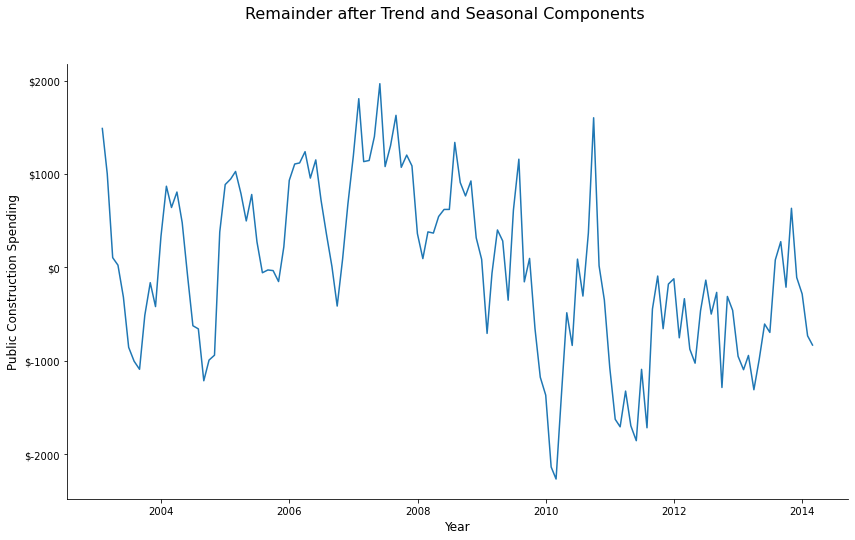

In [10]:
#Autocorrelation of the residual
maxCorr = 0.0
period = np.NaN
for i in range(1, 13):
    corr = dfPub['R2Public'].autocorr(lag = i)
    print('Correlation, lag', i, '  ', corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ', period, '   Maximum Correlation = ', maxCorr)

#Plot the remaining residual
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Remainder after Trend and Seasonal Components', fontsize = 16)

ax.plot(dfPub['R2Public'], label = 'Remainder after Trend and Seasonal Components')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc]);

The final plot shows the orignal time series data along with the fitted model. The residuals not explained by the model are also plotted.

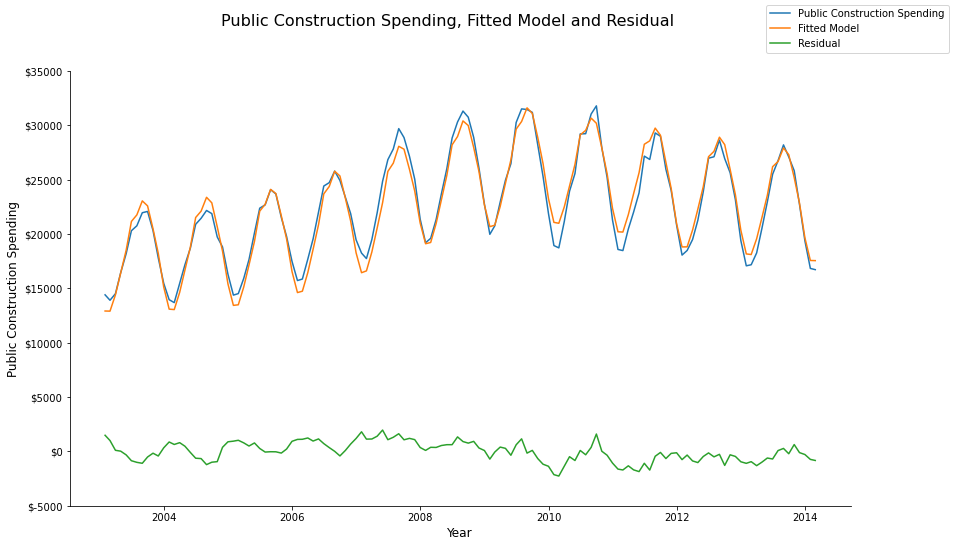

In [11]:
#Plot the original time series, the fitted model, and the residual left from the trend and seasonality
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Public Construction Spending, Fitted Model and Residual', fontsize = 16)

ax.plot(dfPub['Public Construction'], label = 'Public Construction Spending')
ax.plot(dfPub['Fit'], label = 'Fitted Model')
ax.plot(dfPub['R2Public'], label = 'Residual')
plt.ylim(-5000, 35000)
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Public Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
fig.legend();

## Private Construction Spending

In [12]:
#Create a Private Construction dataframe with columns for moving average and squared error
dfPriv = df_cts[['Month', 'Private Construction']]
dfPriv.insert(0, 'Date', pd.date_range(start = '2002-01-31', end = '2014-02-28', freq = 'M')) #Restructure the date
dfPriv = dfPriv.set_index('Date') #Set the date as the index
dfPriv['MovAvgPriv'] = np.NaN
dfPriv['SqErrPriv'] = np.NaN

In this cell, the time series is plotted to visualize the data and observe any trend. The moving average is calculated and plotted over the original time series. This particular moving average calculation method was chosen to reduce the squared error.

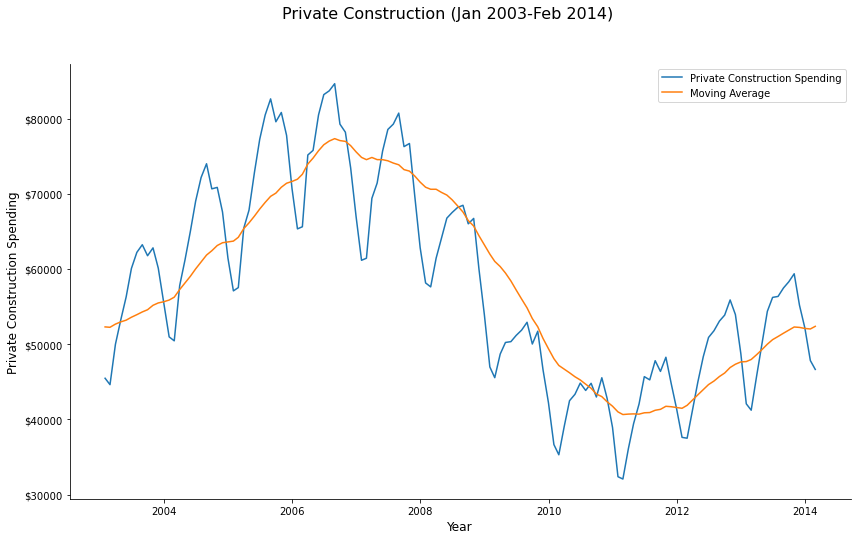

In [13]:
#Create a function for squared error
def SqErr(row):
    return (row['Private Construction'] - row['MovAvgPriv']) ** 2

#Calculate the moving average and squared error
window = 13
dfPriv['MovAvgPriv'] = dfPriv['Private Construction'].rolling(window = window).mean() #This method produces the smallest squared error
dfPriv['SqErrPriv'] = dfPriv.apply(SqErr, axis = 'columns')
dfPriv.dropna(how = 'any', inplace = True)

#Plot the Public Construction dataframe and moving average
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Private Construction (Jan 2003-Feb 2014)', fontsize = 16)

ax.plot(dfPriv['Private Construction'], label = 'Private Construction Spending')
ax.plot(dfPriv['MovAvgPriv'], label = 'Moving Average')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
ax.legend();

The residual Private Construction spending not explained by the moving average is calculated below. Additionally, the residuals are computed as a percentage of spending ($R1ErrorPriv$). The residuals are plotted for visualization. The autocorrelation of seasonal spending is calculated at various lags to determine at what frequency the seasonal pattern repeats.

Average Residual:  -37.330654420206464
Correlation, lag 1    0.8688489985746484
Correlation, lag 2    0.6036600155480428
Correlation, lag 3    0.28797545339165564
Correlation, lag 4    0.01897957320372258
Correlation, lag 5    -0.16612526924334875
Correlation, lag 6    -0.2579326264618903
Correlation, lag 7    -0.20220709992426933
Correlation, lag 8    -0.04836579325648595
Correlation, lag 9    0.19659605543506758
Correlation, lag 10    0.49724317378036137
Correlation, lag 11    0.7478656659852383
Correlation, lag 12    0.8643525526402995
period =  1    Maximum Correlation =  0.8688489985746484


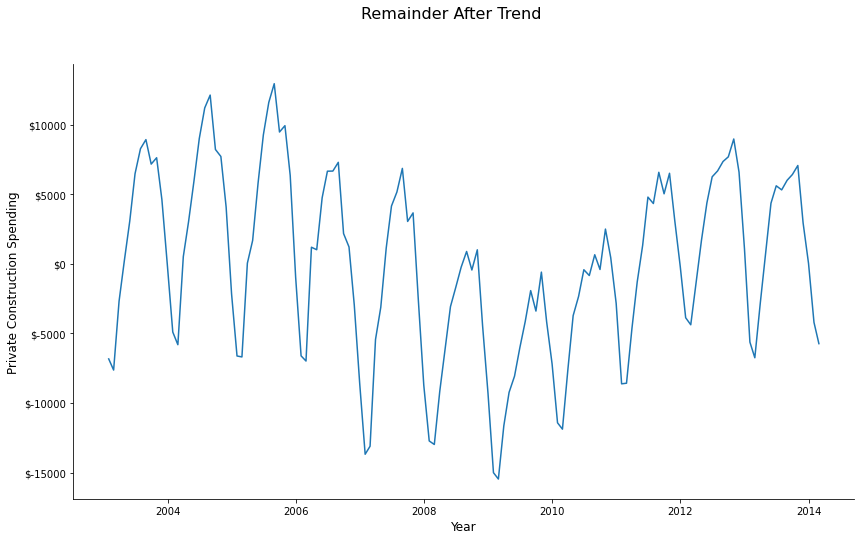

In [14]:
#Calculate the residual not explained by the moving average  
dfPriv['R1Priv'] = dfPriv['Private Construction'] - dfPriv['MovAvgPriv']
dfPriv['R1ErrorPriv'] = abs((dfPriv['Private Construction'] - dfPriv['R1Priv']) / dfPriv['Private Construction'])

print('Average Residual: ', sum(dfPriv['R1Priv']) / len(dfPriv))

#Calculate the correlation at various lags to determine where seasonal pattern exists
maxCorr = 0.0
period = np.NaN
for i in range(1, 13):
    corr = dfPriv['R1Priv'].autocorr(lag = i)
    print('Correlation, lag', i, '  ', corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ', period, '   Maximum Correlation = ', maxCorr)

#Plot the remainder not explained by the trend
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Remainder After Trend', fontsize = 16)

ax.plot(dfPriv['R1Priv'])
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc]);

Below, the time series is broken down into each of the eleven seasons apparent in the data. The average of these is then computed. A column is created in the dataframe to hold the seasonal values for each month.

In [15]:
#Calculate the average of the seasonal periods
period =12
seasonLen = period
avg = []
numSeasons = int(len(dfPriv) / seasonLen + 0.5)
for j in range(seasonLen):
    if j + (numSeasons - 1) * seasonLen < len(dfPriv):
        d = dfPriv.iloc[range(j, j + (numSeasons - 1) * seasonLen + 1, seasonLen)]['R1Priv']
        print(j, d)
        avg.append(sum(d) / len(d))
    else:
        d = dfPriv.iloc[range(j, j + (numSeasons - 2) * seasonLen + 1, seasonLen)]['R1Priv']
        print(j, d)
        avg.append(sum(d) / len(d))
dfPriv['SPriv'] = np.NaN
for i in range(len(dfPriv)):
    dfPriv.loc[dfPriv.index[i], 'SPriv'] = avg[i % seasonLen]


0 Date
2003-01-31    -6827.923077
2004-01-31    -4898.076923
2005-01-31    -6619.000000
2006-01-31    -6608.461538
2007-01-31   -13685.000000
2008-01-31   -12729.076923
2009-01-31   -15010.615385
2010-01-31   -11423.692308
2011-01-31    -8620.923077
2012-01-31    -3867.461538
2013-01-31    -5622.307692
Name: R1Priv, dtype: float64
1 Date
2003-02-28    -7630.692308
2004-02-29    -5806.846154
2005-02-28    -6686.307692
2006-02-28    -6981.461538
2007-02-28   -13108.846154
2008-02-29   -12982.076923
2009-02-28   -15467.230769
2010-02-28   -11880.307692
2011-02-28    -8576.538462
2012-02-29    -4374.384615
2013-02-28    -6746.230769
Name: R1Priv, dtype: float64
2 Date
2003-03-31    -2679.384615
2004-03-31      526.615385
2005-03-31       55.692308
2006-03-31     1203.230769
2007-03-31    -5433.692308
2008-03-31    -9165.461538
2009-03-31   -11639.769231
2010-03-31    -7588.538462
2011-03-31    -4631.461538
2012-03-31    -1278.769231
2013-03-31    -2828.230769
Name: R1Priv, dtype: float64
3

In this cell, the seasonal component from above is plotted with the first residuals to observe how well they correspond.

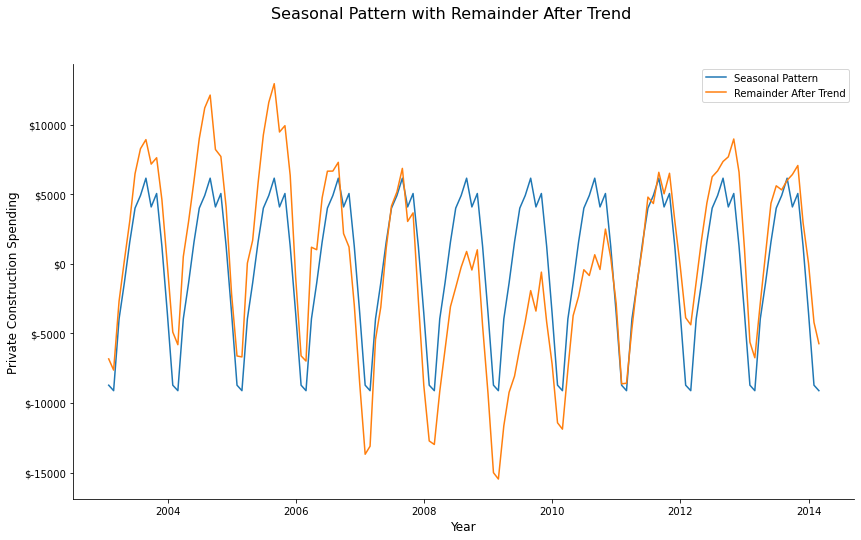

In [16]:
#Plot the seasonal pattern with the remainder after the trend is removed
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Seasonal Pattern with Remainder After Trend', fontsize = 16)

ax.plot(dfPriv['SPriv'], label = 'Seasonal Pattern')
ax.plot(dfPriv['R1Priv'], label = 'Remainder After Trend')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
ax.legend();

Below, the eleven seasonal instances within the time series are plotted along with their average.

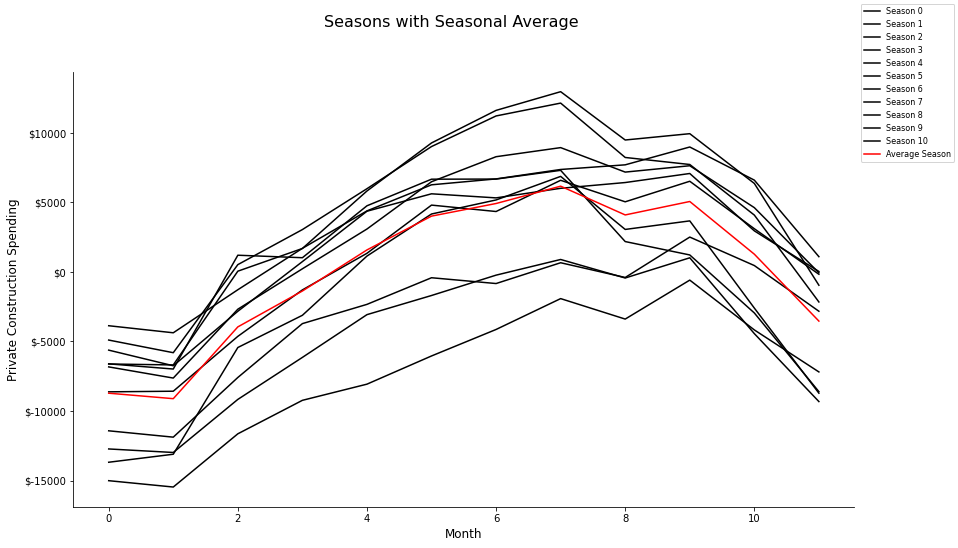

In [17]:
#Plot each year's seasonal pattern with the average
Seasons = [dfPriv.iloc[range(i * period, min((i + 1) * period, len(dfPriv)))]['R1Priv'] for i in range(numSeasons)]
PtsInSeasons = [dfPriv.iloc[range(i , len(dfPriv['R1Priv']), period)]['R1Priv'].tolist() for i in range(period)]

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Seasons with Seasonal Average', fontsize = 16)

for i in range(len(Seasons)):
    ax.plot(Seasons[i].values, label = 'Season ' + str(i), c = 'k')
ax.plot(avg, label = 'Average Season', c = 'r')
ax.set_xlabel('Month', fontsize = 12) 
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
fig.legend(loc = 1, fontsize = 8);

In the plot below, the orignal data is plotted along with the fitted model that takes trend and seasonality into account.

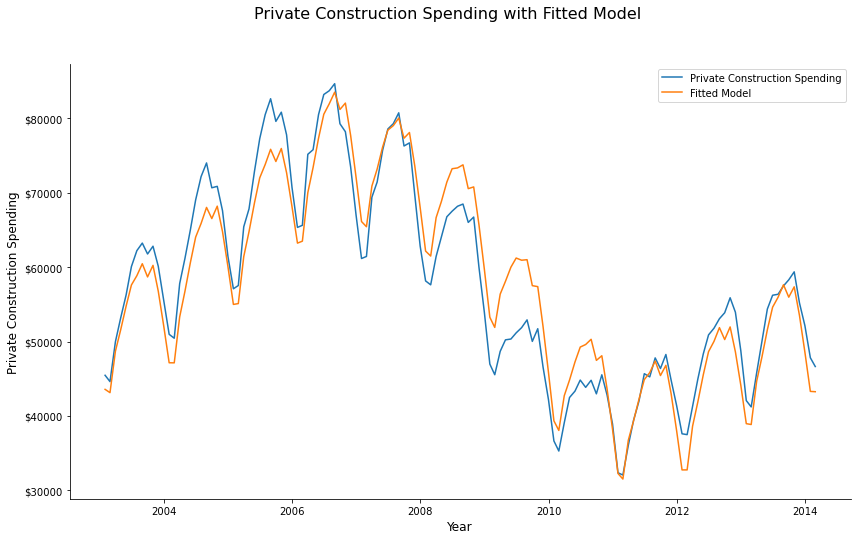

In [18]:
#Find the remaining residual construction spending to be explained after accounting for seasonality
dfPriv['R2Private'] = dfPriv['R1Priv'] - dfPriv['SPriv']
dfPriv['R2ErrorPrivate'] = abs(dfPriv['R2Private'] / dfPriv['Private Construction']) #The absolute error 
dfPriv['Fit'] = dfPriv['MovAvgPriv'] + dfPriv['SPriv'] #The fitted model consisting of trend and seasonality

#Plot the model and the original time series
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Private Construction Spending with Fitted Model', fontsize = 16)

ax.plot(dfPriv['Private Construction'], label = 'Private Construction Spending')
ax.plot(dfPriv['Fit'], label = 'Fitted Model')
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
ax.legend();

In the cell below, the autocorrelation analysis of the residual is performed and the residuals not explained by trend or seasonality are plotted.

Correlation, lag 1    0.959813161139038
Correlation, lag 2    0.9122440763293254
Correlation, lag 3    0.8546967218799694
Correlation, lag 4    0.8012727073463546
Correlation, lag 5    0.7457022159502851
Correlation, lag 6    0.7041332210903977
Correlation, lag 7    0.6826259608981164
Correlation, lag 8    0.6734897836252698
Correlation, lag 9    0.6635866231412735
Correlation, lag 10    0.6627821797906207
Correlation, lag 11    0.659128323090677
Correlation, lag 12    0.6568888989217929
period =  1    Maximum Correlation =  0.959813161139038


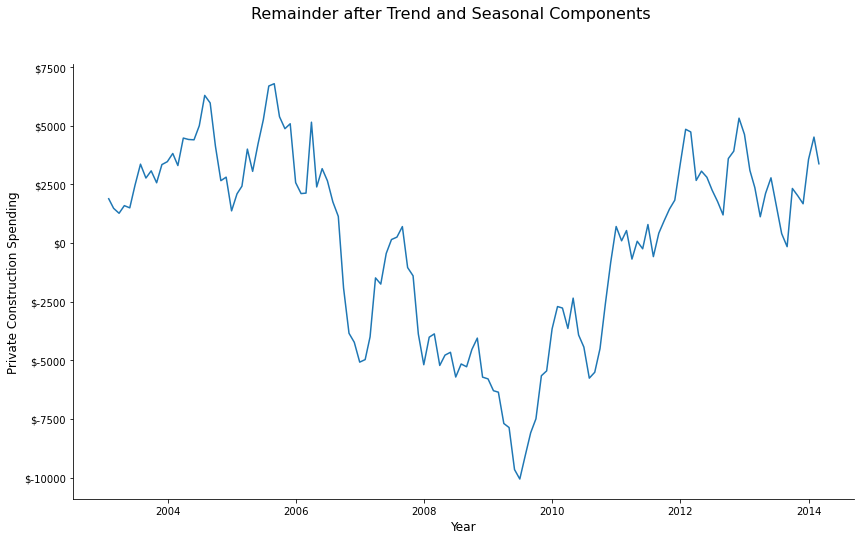

In [19]:
#Autocorrelation of the residual
maxCorr = 0.0
period = np.NaN
for i in range(1, 13):
    corr = dfPriv['R2Private'].autocorr(lag = i)
    print('Correlation, lag', i, '  ', corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ', period, '   Maximum Correlation = ', maxCorr)

#Plot the remaining residual
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Remainder after Trend and Seasonal Components', fontsize = 16)

ax.plot(dfPriv['R2Private'])
ax.set_xlabel('Year', fontsize = 12) 
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc]);

The final plot shows the orignal time series data along with the fitted model. The residuals not explained by the model are also plotted.

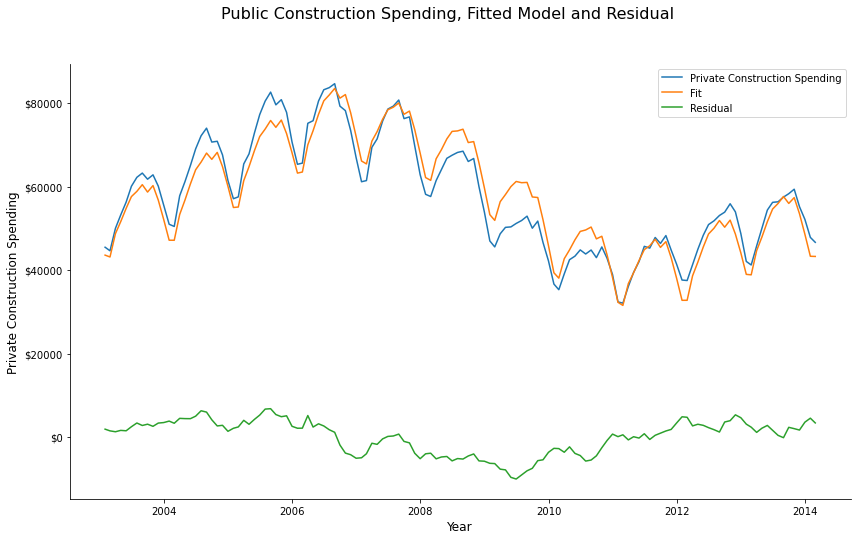

In [20]:
#Plot the original time series, the fitted model, and the residual left from the trend and seasonality
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig.suptitle('Public Construction Spending, Fitted Model and Residual', fontsize = 16)

ax.plot(dfPriv['Private Construction'], label = 'Private Construction Spending')
ax.plot(dfPriv['Fit'], label = 'Fit')
ax.plot(dfPriv['R2Private'], label = 'Residual')
#plt.ylim(-5000, 35000)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Private Construction Spending', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['${:.0f}'.format(x) for x in ticks_loc])
ax.legend();